Hi Everyone. Posting my first kernel on understanding the basic statistical tools in scipy and invoking them.
There exist numerous probability distribution functions that define various real life phenomenon. I am going to explore a few popular discrete and continuous models. Along side, i am going to try form an emperical model for distributions which cannot be adequately parametrised into a few parameters. I'll also perform random sampling from such distributions.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.interpolate import interp1d
import pylab


In [41]:
pylab.rcParams['figure.figsize'] = (9, 6.0)

In [2]:
xs=np.linspace(-5,10,200)
ks= np.arange(50)

### Discrete PMFs
- Binomial Distribution: It can be use to model probability distributions of $k$ sucesses in $n$ trials where the probability of success $p$ is known.

 $$Pr(k;n,p)=\begin{pmatrix} n\\k \end{pmatrix} p^k (1-p)^{n-k}$$
 

- Poisson Distribution: The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period.

$$P(k;\lambda)= \frac{\lambda^k e^{-\lambda}}{k}$$ 

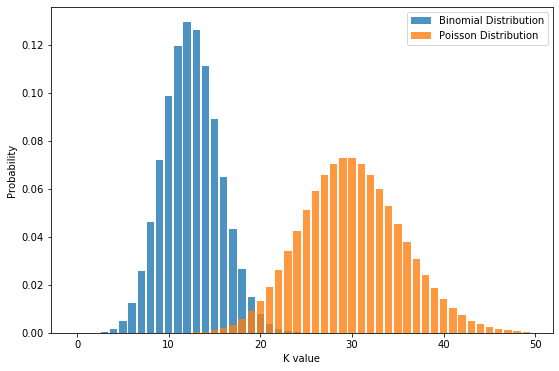

In [3]:
pmf_binom=st.binom.pmf(ks,50,0.25) # Modelling a Binomial distribution with probabilty of success = 25%
plt.bar(ks,pmf_binom,label="Binomial Distribution",alpha=0.8) 
pmf_poisson=st.poisson.pmf(ks,30) # Modelling a poisson distribution with average 30 (say, average support calls received every night)
plt.bar(ks,pmf_poisson,label="Poisson Distribution",alpha=0.8)
plt.xlabel("K value")
plt.ylabel("Probability")
plt.legend();

#### Let's answer these questions: 
- What would be the probablity of getting 10 success from such binomial model?
- Probability of getting upto 15 successes?
- How likely are we to recieve 45 calls in one night?
- What would be the probability of receiving at least 40 calls in one night.

In [4]:

print(f"Probability of getting 10 successes: {st.binom.pmf(10,50,0.25):.3f} ")
print(f"Probability of getting upto 15 successes : {st.binom.cdf(15,50,0.25):.3f} ")
print(f"Probability of getting 45 calls in a night: {st.poisson.pmf(45,30):.4f}")
print(f"Probability of getting atleast 40 calls in a night: {st.poisson.sf(40,30):.4f}") #It's same as 1-CDF


Probability of getting 10 successes: 0.099 
Probability of getting upto 15 successes : 0.837 
Probability of getting 45 calls in a night: 0.0023
Probability of getting atleast 40 calls in a night: 0.0323


### Continous PDFs
- Uniform Distribution: Every outcome is equaly likely and has a constant probability.

$$
f(x) = \left\{
    \begin{array}\\
        \frac{1}{b-a} & \mbox{if } \ a\leq x \leq b  \\
        0 & \mbox{otherwise } 
    \end{array}
\right.
$$


- Normal Distribution


$$
f(x) = \frac{1}{\sqrt{2 \pi} \sigma}e^{-\frac{1}{2}{\begin{pmatrix}{{\frac{x-\mu}{2}}}\end{pmatrix}}^2}
$$


- Exponential Distribution

$$ f(x;\lambda)= \lambda e^{-\lambda x}$$


- Log Normal
- Student's t-distribution

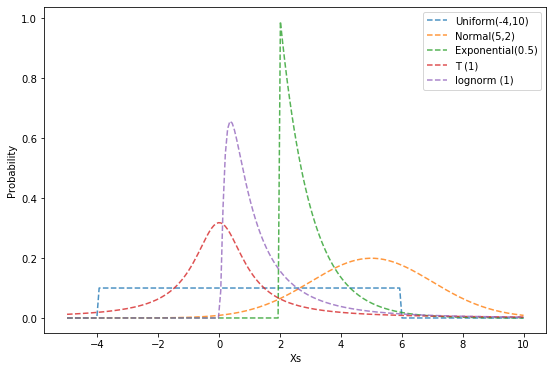

In [5]:
unif_pdf=st.uniform.pdf(xs,-4,10)
plt.plot(xs,unif_pdf,label="Uniform(-4,10)",alpha=0.8,ls="--")
norm_pdf=st.norm.pdf(xs,5,2)
plt.plot(xs,norm_pdf,label="Normal(5,2)",alpha=0.8,ls="--")
exp_pdf=st.expon.pdf(xs,2)
plt.plot(xs,exp_pdf,label="Exponential(0.5)",alpha=0.8,ls="--")
st_pdf=st.t.pdf(xs,1)
plt.plot(xs,st_pdf,label="T (1)",alpha=0.8,ls="--")
pdf_lognorm=st.lognorm.pdf(xs,1)
plt.plot(xs,pdf_lognorm,label="Lognorm (1)",alpha=0.8,ls="--")

plt.legend()
plt.xlabel("Xs")
plt.ylabel("Probability");
    

- Above plot shows comparision between different distribution, given there respective parameters.
- Uniform distribution has upper and lower bound as model parameters.
- Normal distribution has it's mean and standard deviation that uniquely defines the curve. The mean defines the centre of the distribution and thus where the peak lies. The width is given by deviation that shows the spread of our data.
- Exponential distribution can be used to model time intervals between two events and is parametrized by $\lambda$, the rate of change. Radio active decay is the most popular example. 
- Log normal is often prefferd to model RVs which cannot take negative values, such as mass of objects and stock prices. Comparing the above graphs, we notice while the normal curve is symmetrical around the mean, log normal is positively skewed (right). Often, the skewness is important in determining the appropriate distribution for an investment decision-making.
- Student's t-distribution is used where the population size is not enough to be considered as a normal distribution or the population variance is unknown. Above we have plotted a t-distribution with 1 degree of freedom.

## Non Parametrised Statistics.
- There are instances where we have no clue about the underlying distribution of the data and it cannot be given by a mathematical analytic form but instead has a random shape.
- Where we don't have the parameters of the distibution we are considering.

In [43]:
# Let's define some random xs and ys
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

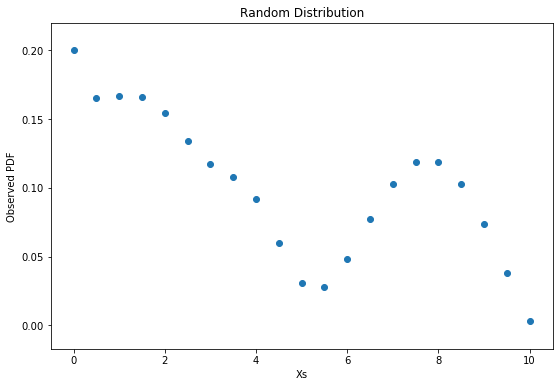

In [44]:
plt.scatter(xs,ys,label="Data")
plt.xlabel("Xs")
plt.ylabel("Observed PDF")
plt.title("Random Distribution");

- The above chart looks nothing like we have seen before and if we we're required to find the values of y for any given x (other than what we already have) we would need to interpolate to find data in between the points.
- We can define our interpolate function from scipy.Interpolate and use that to find the values of y.
- I am going to define two fuctions, linear and quadratic, but if needed higher order functions can be used as well.


In [45]:
x1=np.linspace(min(xs),max(xs),1000) # Defining an array of xs
y1=interp1d(xs,ys)(x1) # Interpolate function; Linear
y2=interp1d(xs,ys,kind="quadratic")(x1) #Quadratic

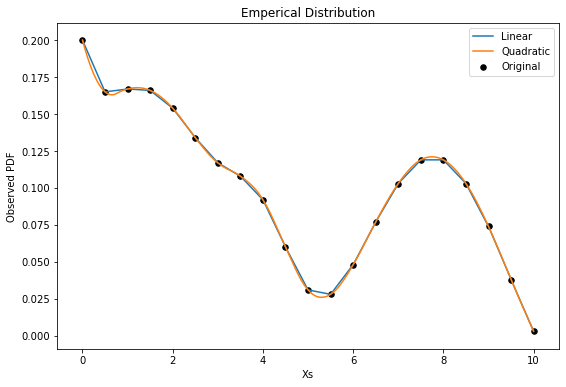

In [46]:
plt.plot(x1,y1,label="Linear")
plt.plot(x1,y2,label="Quadratic")
plt.scatter(xs,ys,c='black',s=30,label="Original")
plt.xlabel("Xs")
plt.ylabel("Observed PDF")
plt.title("Emperical Distribution");
plt.legend();

We see that the Quadratic Function is smooth enough and does a really good job hence there is no reason to move to a cubic or higher order model as there won't be much different. However, can be explored if needed.


Now let's calculate the CDF and the probability between two bounds Using `scipy.integrate`. We have to define our CDF function by integrating the pdf to get the cummalative value.

We have multiple options for that:

* `scipy.integrate.trapz` for low accuracy but high speed.
* `scipy.integrate.simps` for medium accuracy and pretty high speed.
* `scipy.integrate.quad` for high accuracy and low sped.

I am going to use `simps` but other options can be explored if needed.

In [47]:
from scipy.integrate import simps

def get_pdf(x,y,a,b,res=1000):
    x_norm=np.linspace(min(x),max(x),res)
    y_norm=interp1d(x,y,kind="quadratic")(x_norm)
    normalization=simps(y_norm,x_norm)
    
    x1=np.linspace(a,b,res)
    y1=interp1d(x,y,kind="quadratic")(x1)
    pdf=simps(y1,x=x1)/normalization
    return pdf

def get_cdf(x,y,v):
    return get_pdf(x,y,min(x),v)
    
def get_sf(x,y,v):
    return 1- get_cdf(x,y,v)

#### Plotting the graph

In [48]:
def plot_pdf(x,y,a,b):
    x_interpolate=np.linspace(min(x),max(x),1000)
    y_interpolate=interp1d(x,y,kind="quadratic")(x_interpolate)
    plt.plot(x_interpolate,y_interpolate,label="Interpolation")
    plt.scatter(x,y,s=20,label="Original")
    z=plt.fill_between(x1,0,y_interpolate,where=(x1>=a) & (x1<=b),alpha=0.5)
    plt.annotate(f"p = {get_pdf(x,y,a,b):.3f}",(7,0.05))
    plt.xlabel("Values of Xs")
    plt.ylabel("Probability")
    plt.title("PDF of a Non-Parametrized Distribution")
    plt.legend()

Probability of getting a value between 6 and 9 is: 0.293


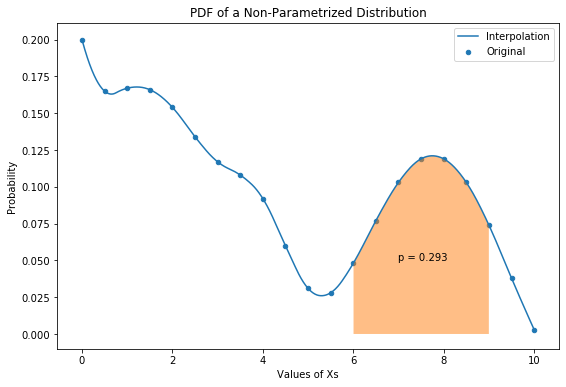

In [49]:
print(f"Probability of getting a value between 6 and 9 is: {np.round(get_cdf(xs,ys,v=9)-get_cdf(xs,ys,v=6),3)}")
plot_pdf(xs,ys,a=6,b=9)

- For plotting the CDF of the function we need to take the cummalative sum over ys and normalize it to keep the value between 0 and 1.
- An alternate way could be adding the pdfs, defined above, at every point of x which will give a more accurate result but will be considerable slower. As long as we have enough points, $cumsum()$ should work really well.

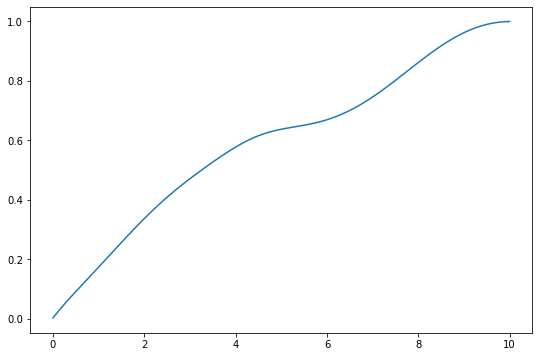

In [50]:
x1=np.linspace(min(xs),max(xs),1000)
y2=interp1d(xs,ys,kind="quadratic")(x1)
cdf=y2.cumsum()/y2.sum()
plt.plot(x1,cdf)
plt.xlabel("Values of xs")
plt.ylabel("Probability of X<=x")
plt.title("CDF of a Non-Parametrized Distribution");

## Sampling from a distribution
- Sampling can be done easily with the rvs function within each distribution

10 samples from a Normal distribution with mean 10 and sd 2:
 [ 9.11155353 10.27975011  8.99716689  6.80213797  8.12265806 10.52586733
  9.87696663  8.68707095  9.17179017  8.43055869]


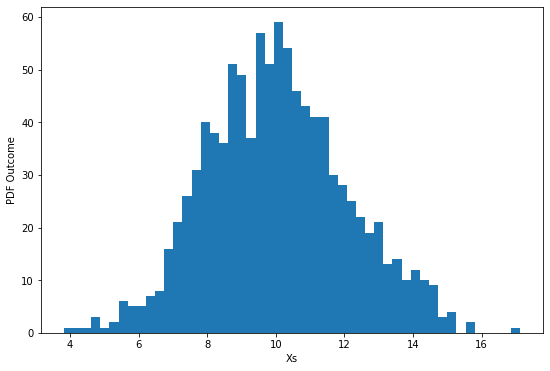

In [51]:
plt.hist(st.norm.rvs(10,2,1000),bins=50);  # Random Sampling from a normal distribution. There arrays show the X and Y values
plt.xlabel("Xs")
plt.ylabel("PDF Outcome");
print(f"10 samples from a Normal distribution with mean 10 and sd 2:\n {st.norm.rvs(10,2,10)}")


- Let's do a Random sampling from rolls of three dice and check if the sum is greater/smaller than certain number
- Since all the sides are equaly likely we can take random sample from an uniform distribution

Number of times the rolled sum was greater than 16 is 18


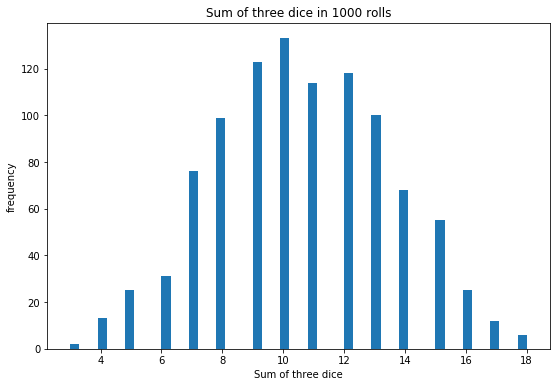

In [21]:
samples=np.ceil(st.uniform.rvs(0,6,(1000,3))).sum(axis=1)
print(f"Number of times the rolled sum was greater than 16 is {np.sum(samples>16)}")
plt.hist(samples,bins=50);
plt.xlabel("Sum of three dice")
plt.ylabel("frequency")
plt.title("Sum of three dice in 1000 rolls");

### Rejection Sampling

Let us say we don't have a nice easy analytic distribution, and that we cannot use one to approximate our distribution. 
The idea of rejection sampling is that although we cannot easily sample from $f$ , there exists another density $g$, like a Normal distribution,uniform distribution or perhaps a t-distribution, from which it is easy for us to sample (because there’s a built in function or someone else wrote a nice function). Then we can sample from  g directly and then “reject” the samples in a strategic way to make the resulting “non-rejected” samples look like they came from f.

The problem with rejection sampling is that it is inefficient as considarable amaount of points will be rejected.

In a simpler way:

1. Sample a uniform `x` value (You can choose any other predefined dist as well as long as it make sense)
2. Sample a uniform `y` value from `0` to the maximum probability in your PDF
3. If $y > p(x)$, throw out the point.

Easier to see in practise. Lets try and sample from the *unnormalised* distribution $p(x) = \sin(x^2) + 1$ from $0 \rightarrow 4$ 

In [52]:
xs=np.linspace(0,4,200) #Defining p(x)
def pdf(xs):
    return(np.sin(xs**2)+1)

px=pdf(xs)

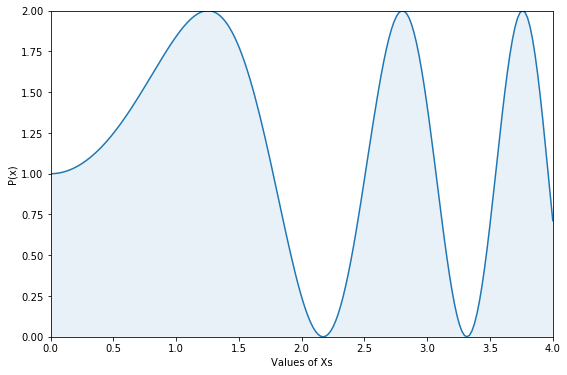

In [57]:
plt.plot(xs,px,label="Actual curve")
plt.fill_between(xs,0,px,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2)
plt.xlabel("Values of Xs")
plt.ylabel("P(x)");

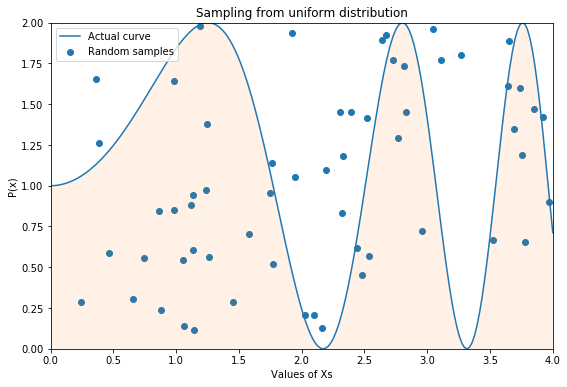

In [54]:
random_x=st.uniform.rvs(0,4,100)
random_y=st.uniform.rvs(0,4,100)
plt.scatter(random_x,random_y,label="Random samples")
plt.plot(xs,px,label="Actual curve")
plt.fill_between(xs,0,px,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2)
plt.xlabel("Values of Xs")
plt.ylabel("P(x)")
plt.title("Sampling from uniform distribution")
plt.legend(loc=2);

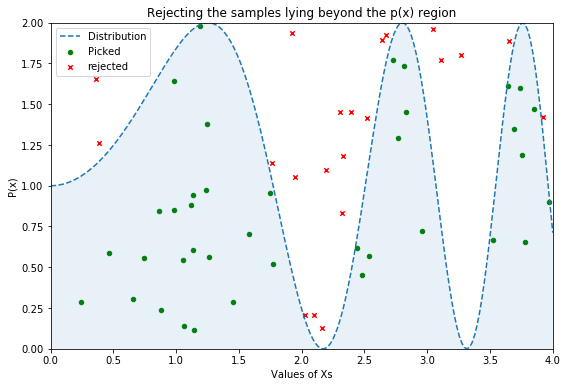

In [55]:
passed=random_y<pdf(random_x)
plt.scatter(random_x[passed],random_y[passed],label="Picked",c='g',s=20)
plt.scatter(random_x[~passed],random_y[~passed],label="rejected",c='r',s=20,marker='x')
plt.plot(xs,px,label="Distribution",ls="--")
plt.fill_between(xs,0,px,alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2)
plt.legend(loc=2)
plt.xlabel("Values of Xs")
plt.ylabel("P(x)")
plt.title("Rejecting the samples lying beyond the p(x) region");

###### To plot a pdf we have to normalize the distribution by it's Integral value. 
Note: A histogram can be normalised just by adding $Density=True$. However, need to normalize the distrubution functions otherwise

Let us sample from the above distribution. Note: if we need n samples, we just need to take some n2>n random samples and keep adding onto it as a part of n2 gets rejected, until we get n points.

Number of points selected: 59521


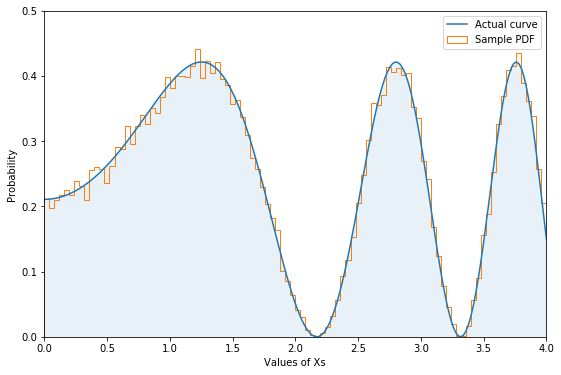

In [56]:
n2=100000
x=st.uniform.rvs(scale=4,size=n2) #Scale is just the parameter of uniform dist(b-a)
y=st.uniform.rvs(scale=2,size=n2) #All the values 
x_final=x[y<=pdf(x)]  #Accepted values
print(f"Number of points selected: {len(x_final)}")
integral=simps(px,x=xs)
plt.plot(xs,px/integral,label="Actual curve")
plt.fill_between(xs,0,px/integral,alpha=0.1) #to make this an actual PDF between 0 and 1
plt.hist(x_final,density=True,histtype='step',bins=100,label='Sample PDF')
plt.legend()
plt.xlim(0,4)
plt.ylim(0,0.5)
plt.xlabel("Values of Xs")
plt.ylabel("Probability");

We see that by taking `100000` points we just get around `59000` samples. So if we need `100000` samples in first place, then we have to keep texting more points.







# Thank You!





### Inversion Sampling

This is harder to conceptually understand. But the way I can put it the simplest is that we know that, for all PDFs, the CDF is going to go from 0 to 1. If we can uniformly sample the CDF from 0 to 1, can we invert our function so that we can recover the $x$ value that gives the sampled CDF value? For some functions, yes. For some, no, the math isn't solvable.

The function above is tricky, so let's find a function that's simpler to sample.

Let's say our new PDF is $p(x) = 3 x^2$ from $0 \rightarrow 1$. As opposed to the previous function, this one is normalised.

So, we can find the CDF via

$$ CDF(x) = \int_0^x p(x^\prime) dx^\prime = x^3 $$

Once we have the CDF, we want to invert it. That is, at the moment, we have an $x$ value and get a $y$ value - the CDF. We want to give it a CDF and get the $x$ value:

$$ y = x^3 \rightarrow x = y^3 $$

Which means $y = x^{1/3}$. Or to put the CDF syntax back in, $x = CDF^{1/3}$

(0, 1)

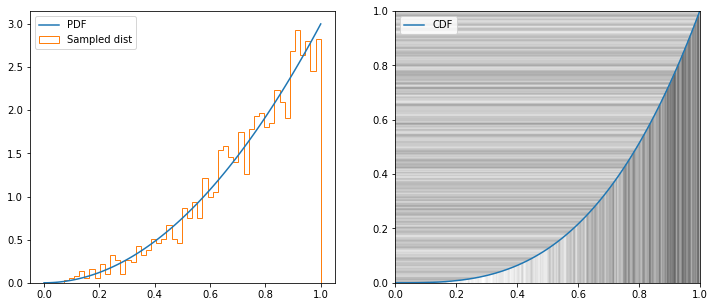

In [202]:
x1=np.linspace(0,1,100)

def pdf1(xs):
    return 3*(xs**2)

def cdf1(xs):
    return (xs**3)

def icdf1(y):
    return y**(1/3)
    
ps=pdf1(x1)
cdf=cdf1(x1)

n= 2000

u_samps=st.uniform.rvs(size=n)
x_samps=icdf1(u_samps)

fig,axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].plot(x1,ps,label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled dist", bins=50)

axes[1].plot(x1,cdf,label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)

axes[0].legend(),axes[1].legend()
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)



## Statistics

In [3]:
data=np.loadtxt("loaded_500.txt")

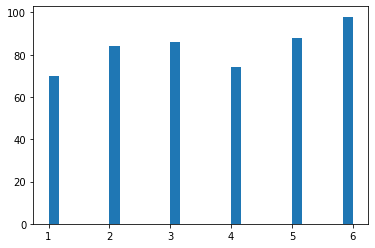

In [10]:
plt.hist(data,bins=30);

In [14]:
unique, counts=np.unique(data,return_counts=True)

In [15]:
print(unique,counts)

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


In [38]:
num_sixes=(data==6).sum()
num_tot=data.size

### Reduce or quantify data

We don't need each individual roll. We really just want the total number of sixes rolled and the total number of rolls.

### Pose our Hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$. As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

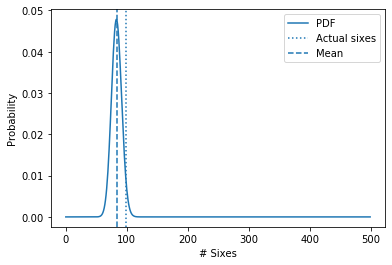

In [39]:
n=np.arange(num_tot)
dist_sixes=st.binom.pmf(n,num_tot,1/6)
plt.plot(n,dist_sixes,label='PDF')
plt.axvline(num_sixes,ls=":",label="Actual sixes")
plt.axvline(num_tot/6,ls="--",label="Mean")
plt.legend()
plt.xlabel("# Sixes")
plt.ylabel("Probability");

In [53]:
d= st.binom(num_tot,1/6)
p_val=1-d.cdf(num_sixes)

Only 3.7% of the time with a fair dice you'd roll more tha 98 of sixes


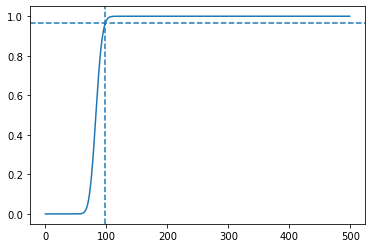

In [56]:
plt.plot(n,d.cdf(n))
plt.axvline(num_sixes,ls="--",label="Mean")
plt.axhline(1-p_val,ls="--",label="cutoff")
print(f"Only {p_val*100:.1f}% of the time with a fair dice you'd roll more than {num_sixes} of sixes")

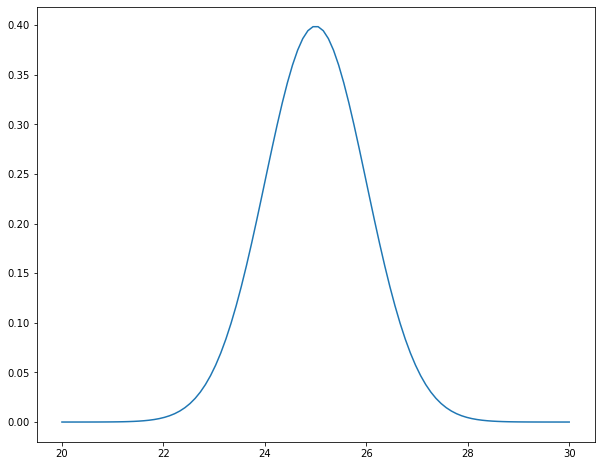

In [37]:
pdf=st.norm.pdf(np.linspace(20,30,100),25,1)
plt.plot(np.linspace(20,30,100),pdf)

In [ ]:
https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html

In [100]:
from IPython.display import Math
Math(r'F(x) = sin({x}^2) + 1')

<IPython.core.display.Math object>